In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers
import numpy as np

planarity_crit = pc.PlanarityCriterion()
# solver_CNF = pc.CNF2Solver()
printer = printers.Printer()

In [3]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 3339893496


Seed:  1966


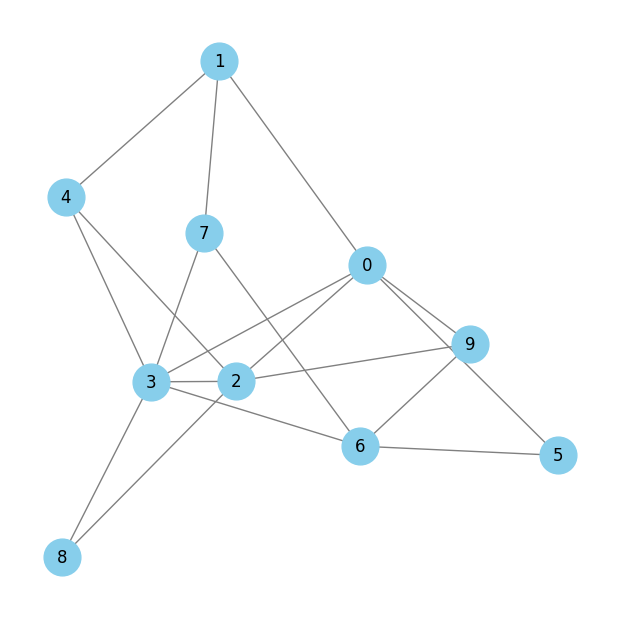

In [4]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = 1966#random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 10 # Number of nodes
p = 0.33 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [5]:
### CREATE SPANNING TREE ###
spanning_tree = planarity_crit.spanning_tree(G)
print(spanning_tree.edges)

[(8, 2), (2, 0), (0, 1), (1, 4), (4, 3), (3, 6), (6, 5), (6, 7), (6, 9)]


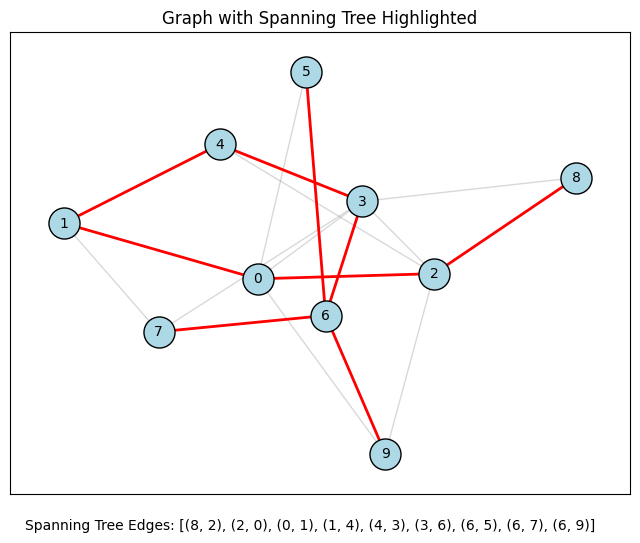

In [6]:
### PRINT SPANNING TREE ### 
printer.print_spanning_tree(G, spanning_tree, save=True, name="spanning tree stp by stp")

In [7]:
### GENERATE SET OF FUNDAMENTAL CYCLES ### 

fundamental_cycles = planarity_crit.fundamental_cycles(G, spanning_tree)
print(fundamental_cycles) ### TODO VER SI SE PUEDE HACER TAMBIÉN CON LA LIBRERÍA DE NETWORKX

[[0, 1, 4, 3, 0], [0, 1, 4, 3, 6, 5, 0], [0, 1, 4, 3, 6, 9, 0], [1, 4, 3, 6, 7, 1], [2, 0, 1, 4, 3, 2], [2, 0, 1, 4, 2], [2, 0, 1, 4, 3, 6, 9, 2], [3, 6, 7, 3], [3, 4, 1, 0, 2, 8, 3]]


In [8]:
### GET BRIDGES OF EACH CYCLE ###

bridges_all_cycles = planarity_crit.get_bridges(G, fundamental_cycles)
print(bridges_all_cycles) ### TODO QUITAR ESTO

{(0, 1, 4, 3, 0): [{'edges': [(2, 8), (2, 9), (5, 6), (6, 7), (6, 9), (0, 2), (0, 5), (0, 9), (1, 7), (4, 2), (3, 2), (3, 6), (3, 7), (3, 8)], 'att_ver': {0, 1, 3, 4}}], (0, 1, 4, 3, 6, 5, 0): [{'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(2, 8), (2, 9), (0, 2), (0, 9), (4, 2), (3, 2), (3, 8), (6, 9)], 'att_ver': {0, 3, 4, 6}}, {'edges': [(1, 7), (3, 7), (6, 7)], 'att_ver': {1, 3, 6}}], (0, 1, 4, 3, 6, 9, 0): [{'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(2, 8), (0, 2), (4, 2), (3, 2), (3, 8), (9, 2)], 'att_ver': {0, 9, 3, 4}}, {'edges': [(0, 5), (6, 5)], 'att_ver': {0, 6}}, {'edges': [(1, 7), (3, 7), (6, 7)], 'att_ver': {1, 3, 6}}], (1, 4, 3, 6, 7, 1): [{'edges': [(3, 7)], 'att_ver': {3, 7}}, {'edges': [(0, 2), (0, 5), (0, 9), (2, 8), (2, 9), (1, 0), (4, 2), (3, 0), (3, 2), (3, 8), (6, 5), (6, 9)], 'att_ver': {1, 3, 4, 6}}], (2, 0, 1, 4, 3, 2): [{'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(5, 6), (6, 7), (6, 9), (2, 9), (0, 5)

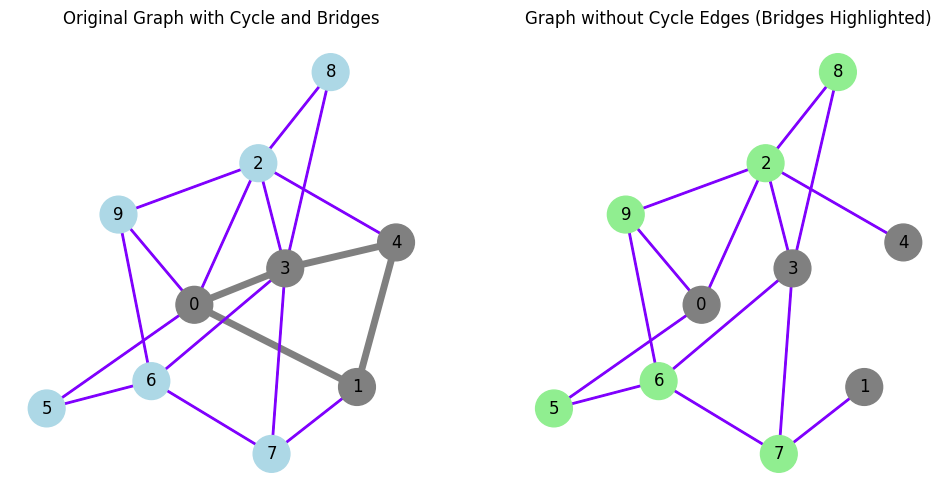

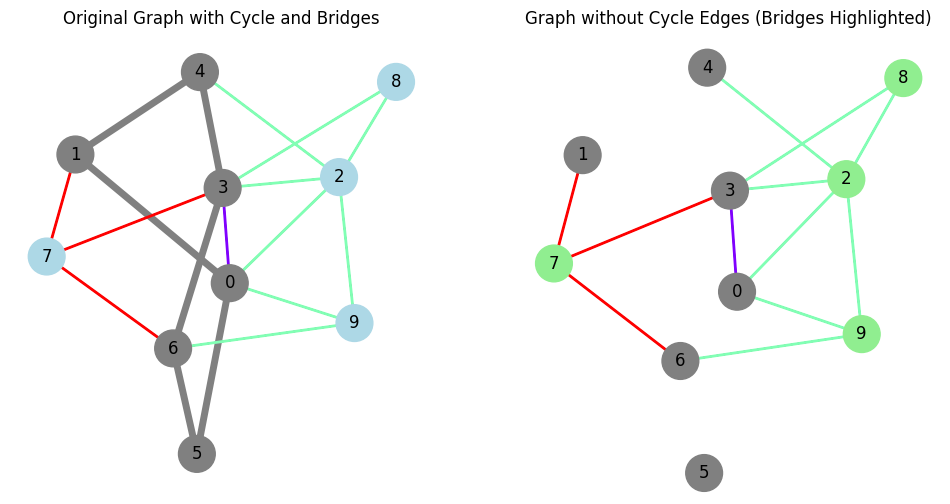

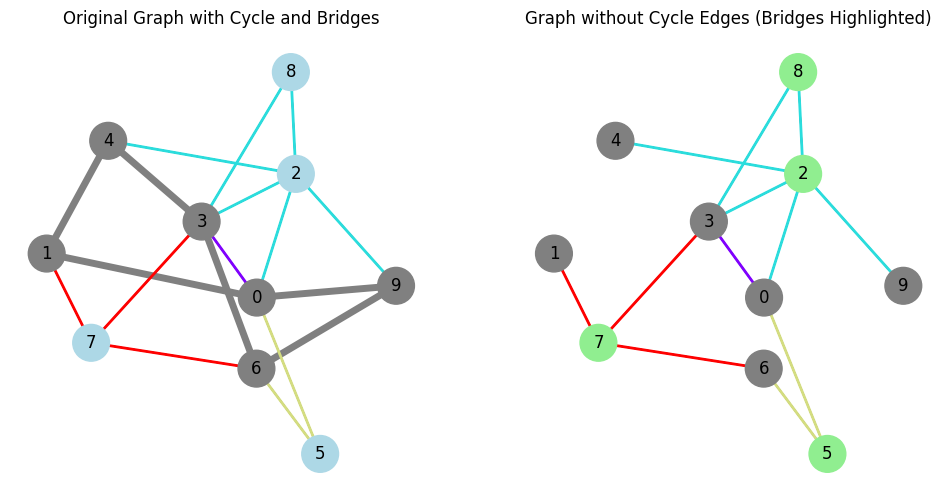

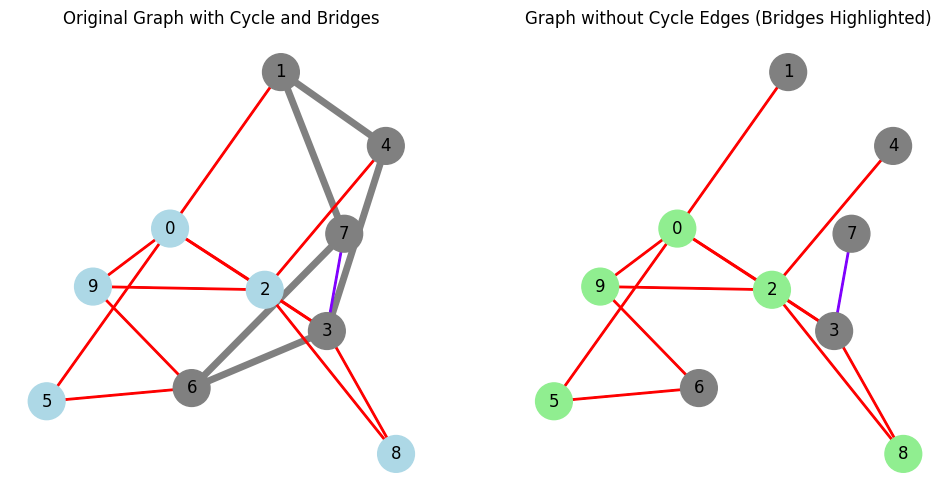

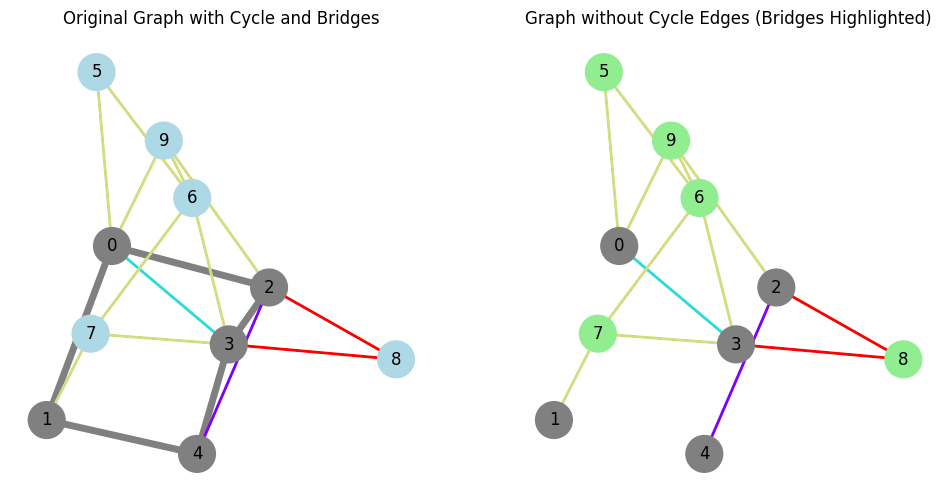

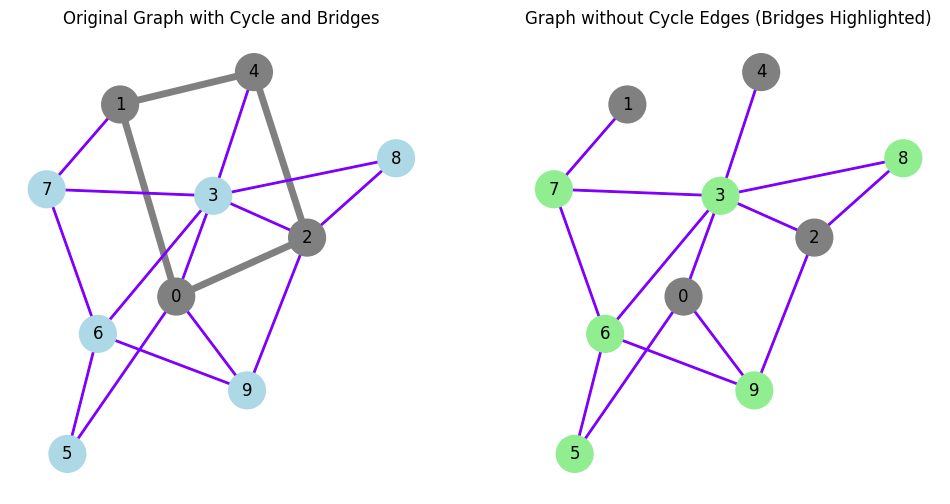

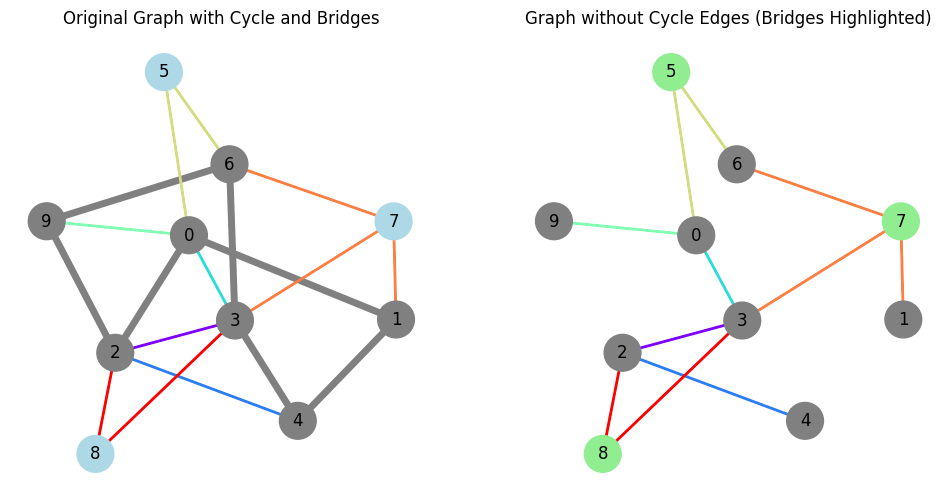

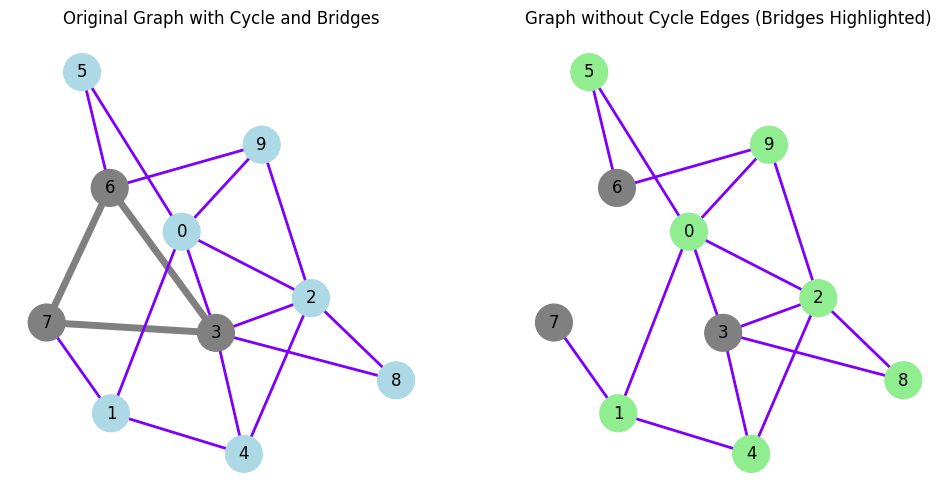

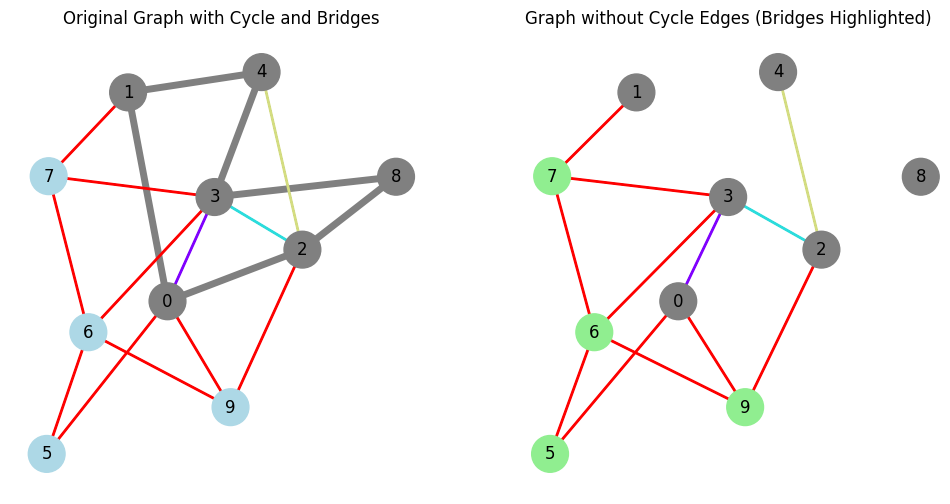

In [9]:
### PRINT BRIDGES OF EACH CYCLE ### TODO

printer.print_bridges(G, bridges_all_cycles, save=True, name="cycles stp by stp")

In [10]:
### De aquí en adelante está hecho con el solver antiguo intentando usar las listas.

### GET CNF LISTS ###

CNF_lists = planarity_crit.get_2_CNF(G, fundamental_cycles, bridges_all_cycles)

AttributeError: 'PlanarityCriterion' object has no attribute 'get_2_CNF'

In [ ]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)

In [ ]:
### COMPLETE CNF LISTS ### TODO

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

cycle_index_map = {}
for i, c in enumerate(fundamental_cycles):
    cycle_index_map[tuple(c)] = i

CNF_lists = solver_CNF.update_CNF_iterative(
    CNF_lists, G, fundamental_cycles, edge_index_map, cycle_index_map
)

In [ ]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)

In [ ]:
### GET PSEUDOEMBEDDING ###

In [ ]:
### GET NEW PERIPHERAL CYCLE BASIS ###

In [ ]:
### GET PLANE MESH AND CHECK PLANARITY ###